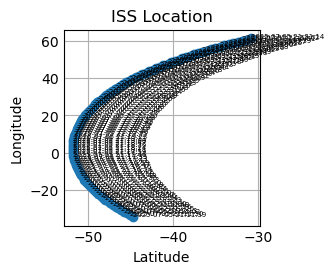

In [20]:
import requests
import matplotlib.pyplot as plt
import time
from datetime import datetime

latitude = []
longitude = []
timeplot = []
cleaned_date = []

def fetch_data_from_api(api_url):
        response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
        data = response.json()
        return data

def main():
    data_point_count = 0

    api_endpoint = "https://jsonplaceholder.typicode.com/posts/1"
    fetch_interval_seconds = 10

        
    while data_point_count != 100:
        fetched_data = fetch_data_from_api(api_endpoint)
            
        if fetched_data:
            latitude.append(fetched_data.get('latitude'))
            longitude.append(fetched_data.get('longitude'))
            timeplot.append(fetched_data.get('timestamp'))
            pass 
        time.sleep(fetch_interval_seconds)
        data_point_count += 1

    cleaned_date = list(map(lambda x: datetime.fromtimestamp(x), timeplot))
        
    plt.style.use('_mpl-gallery')

    fig, ax = plt.subplots()
    
    ax.plot(latitude, longitude, 'o-', linewidth=1)
    
    for i, txt in enumerate(cleaned_date):
        plt.annotate(txt, (latitude[i], longitude[i]), textcoords="offset points", xytext=(0,0), ha='left', fontsize = 5)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.title("ISS Location")
    plt.rcParams["figure.figsize"] = (20,3)
    
    plt.show()

main()

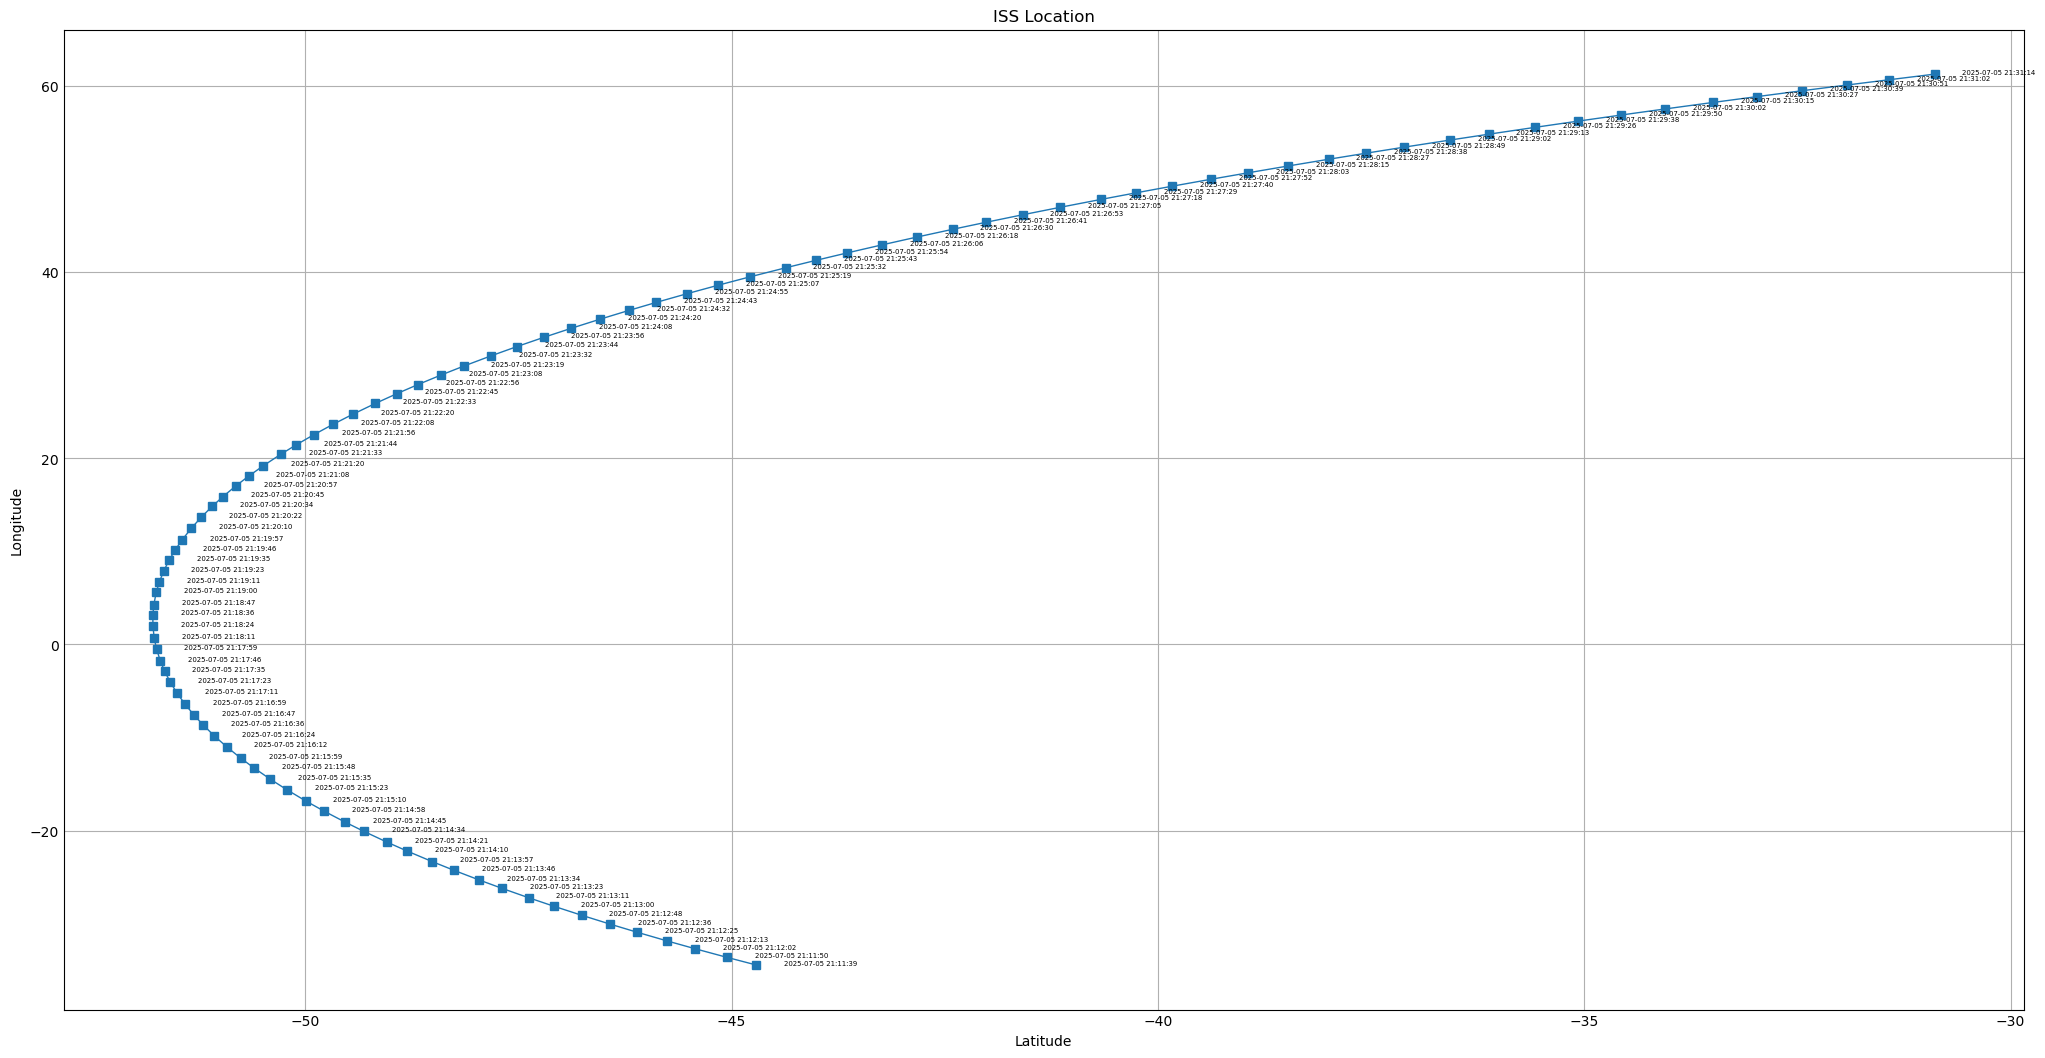

In [45]:
#Fix the table size
cleaned_date = list(map(lambda x: datetime.fromtimestamp(x), timeplot))

fig, ax = plt.subplots()
    
ax.plot(latitude, longitude, 's-', linewidth=1)
    
for i, txt in enumerate(cleaned_date):
    plt.annotate(txt, (latitude[i], longitude[i]), textcoords="offset points", xytext=(20,0), ha='left', fontsize = 5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("ISS Location")
plt.rcParams["figure.figsize"] = (20,8)
    
plt.show()